# WeatherPy
----

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [7]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [8]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) 
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
lat = []
long = []
temp_max = []
city_name = []
clouds = []
wind_speed = []
humidity = []


# set units 
units = "Imperial"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url1 = url + "appid=" + api_key + "&q="

# Create counters
count_city = 0
count_fail = 0
city_set = 1

# Print to logger 
print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through all the cities in our list
for city in cities:
    
    # Add 1 to the record count
    count_city += 1
    
    # Log the url, record, and set numbers
    print(f"Beginning Data Retrieval {count_city} of Set {city_set}") 
    
    # Create endpoint URL with each city
    query_url = f"{query_url1} + {city} + &units={units}"
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(query_url).json()
        
        # Parse out the variables and append to the respective list 
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        temp_max.append(weather_json["main"]["temp_max"])
        city_name.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        humidity.append(weather_json["main"]["humidity"])
        
        # Group cities in sets of 50 for logging purpose
        if count_city % 50 == 0:
            city_set += 1
            count_city = 0  
            
    # If an error is experienced, skip the city       
    except:
        BOLD = '\033[1m'
        END = '\033[0m'
        print(f"{city.title()} was {BOLD}NOT{END} found. Skipping...")
        if count_city % 50 == 0:
            city_set += 1
            count_city = 0

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Beginning Data Retrieval 1 of Set 1
Beginning Data Retrieval 2 of Set 1
Beginning Data Retrieval 3 of Set 1
Beginning Data Retrieval 4 of Set 1
Beginning Data Retrieval 5 of Set 1
Yaan was NOT found. Skipping...
Beginning Data Retrieval 6 of Set 1
Beginning Data Retrieval 7 of Set 1
Beginning Data Retrieval 8 of Set 1
Beginning Data Retrieval 9 of Set 1
Beginning Data Retrieval 10 of Set 1
Beginning Data Retrieval 11 of Set 1
Beginning Data Retrieval 12 of Set 1
Rawannawi was NOT found. Skipping...
Beginning Data Retrieval 13 of Set 1
Beginning Data Retrieval 14 of Set 1
Beginning Data Retrieval 15 of Set 1
Beginning Data Retrieval 16 of Set 1
Beginning Data Retrieval 17 of Set 1
Beginning Data Retrieval 18 of Set 1
Beginning Data Retrieval 19 of Set 1
Tsihombe was NOT found. Skipping...
Beginning Data Retrieval 20 of Set 1
Beginning Data Retrieval 21 of Set 1
Beginning Data Retrieval 22 of Set 1
Beginning Data Retrieval 23 of Set 

Beginning Data Retrieval 41 of Set 4
Beginning Data Retrieval 42 of Set 4
Beginning Data Retrieval 43 of Set 4
Beginning Data Retrieval 44 of Set 4
Beginning Data Retrieval 45 of Set 4
Beginning Data Retrieval 46 of Set 4
Beginning Data Retrieval 47 of Set 4
Beginning Data Retrieval 48 of Set 4
Beginning Data Retrieval 49 of Set 4
Attawapiskat was NOT found. Skipping...
Beginning Data Retrieval 50 of Set 4
Beginning Data Retrieval 1 of Set 5
Beginning Data Retrieval 2 of Set 5
Beginning Data Retrieval 3 of Set 5
Beginning Data Retrieval 4 of Set 5
Illoqqortoormiut was NOT found. Skipping...
Beginning Data Retrieval 5 of Set 5
Beginning Data Retrieval 6 of Set 5
Beginning Data Retrieval 7 of Set 5
Amderma was NOT found. Skipping...
Beginning Data Retrieval 8 of Set 5
Beginning Data Retrieval 9 of Set 5
Abu Samrah was NOT found. Skipping...
Beginning Data Retrieval 10 of Set 5
Nikolskoye was NOT found. Skipping...
Beginning Data Retrieval 11 of Set 5
Beginning Data Retrieval 12 of Set 5


Beginning Data Retrieval 35 of Set 8
Beginning Data Retrieval 36 of Set 8
Beginning Data Retrieval 37 of Set 8
Beginning Data Retrieval 38 of Set 8
Beginning Data Retrieval 39 of Set 8
Beginning Data Retrieval 40 of Set 8
Beginning Data Retrieval 41 of Set 8
Beginning Data Retrieval 42 of Set 8
Beginning Data Retrieval 43 of Set 8
Beginning Data Retrieval 44 of Set 8
Luang Prabang was NOT found. Skipping...
Beginning Data Retrieval 45 of Set 8
Beginning Data Retrieval 46 of Set 8
Beginning Data Retrieval 47 of Set 8
Beginning Data Retrieval 48 of Set 8
Beginning Data Retrieval 49 of Set 8
Beginning Data Retrieval 50 of Set 8
Beginning Data Retrieval 1 of Set 9
Bargal was NOT found. Skipping...
Beginning Data Retrieval 2 of Set 9
Beginning Data Retrieval 3 of Set 9
Vaitupu was NOT found. Skipping...
Beginning Data Retrieval 4 of Set 9
Yeehaw Junction was NOT found. Skipping...
Beginning Data Retrieval 5 of Set 9
Beginning Data Retrieval 6 of Set 9
Beginning Data Retrieval 7 of Set 9
Beg

Beginning Data Retrieval 26 of Set 12
Beginning Data Retrieval 27 of Set 12
Beginning Data Retrieval 28 of Set 12
Beginning Data Retrieval 29 of Set 12
Tidore was NOT found. Skipping...
Beginning Data Retrieval 30 of Set 12
Beginning Data Retrieval 31 of Set 12
Beginning Data Retrieval 32 of Set 12
Beginning Data Retrieval 33 of Set 12
Beginning Data Retrieval 34 of Set 12
Beginning Data Retrieval 35 of Set 12
Beginning Data Retrieval 36 of Set 12
Beginning Data Retrieval 37 of Set 12
Beginning Data Retrieval 38 of Set 12
Beginning Data Retrieval 39 of Set 12
Beginning Data Retrieval 40 of Set 12
Beginning Data Retrieval 41 of Set 12
Beginning Data Retrieval 42 of Set 12
Beginning Data Retrieval 43 of Set 12
Beginning Data Retrieval 44 of Set 12
Beginning Data Retrieval 45 of Set 12
Beginning Data Retrieval 46 of Set 12
Sakakah was NOT found. Skipping...
Beginning Data Retrieval 47 of Set 12
Beginning Data Retrieval 48 of Set 12
Beginning Data Retrieval 49 of Set 12
Beginning Data Retr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Convert arrays of JSONs into Pandas DataFrame

weather_dict = {"Max Temperature": temp_max, "Longitude": long, "Latitude": lat, "Humidity": humidity, "City": city_name, "Cloudiness": clouds, "Wind Speed": wind_speed}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Max Temperature,Longitude,Latitude,Humidity,City,Cloudiness,Wind Speed
0,51.19,53.15,67.68,70,Iskateley,52,20.31
1,81.00,-73.76,42.65,61,Albany,40,9.17
2,79.00,140.83,35.73,94,Hasaki,40,5.82
3,82.40,-58.16,6.80,83,Georgetown,75,4.70
4,54.07,-53.46,-33.70,77,Chuy,100,11.59


In [13]:
# Show Record Count 
weather_df.count()

Max Temperature    560
Longitude          560
Latitude           560
Humidity           560
City               560
Cloudiness         560
Wind Speed         560
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
---

In [14]:
lat = weather_df["Latitude"]
temp = weather_df["Max Temperature"]


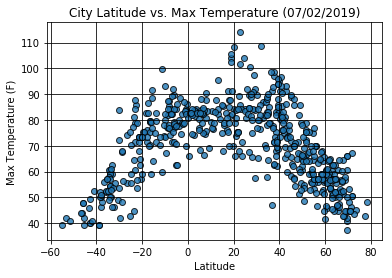

In [15]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lat, temp, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which='major', color='black', linestyle='-')

# Save the figure
plt.savefig("img/latvsMaxtemp.png")

# Show Plot 
plt.show()


## Latitude vs. Humidity Plot
---

In [20]:
hum = weather_df["Humidity"]

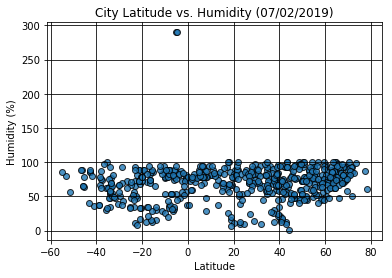

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, hum, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major', color='black', linestyle='-')

# Save the figure
plt.savefig("img/latvsHumidity.png")

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot
---

In [22]:
cloud = weather_df["Cloudiness"]

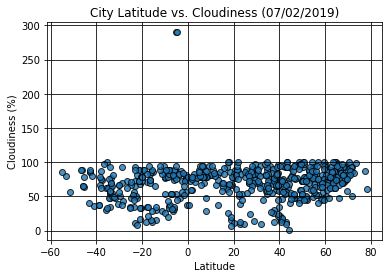

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, hum, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major', color='black', linestyle='-')

# Save the figure
plt.savefig("img/latvsCloudiness.png")

# Show plot
plt.show()


## Latitude vs. Wind Speed Plot
---

In [24]:
wind_speed = weather_df["Wind Speed"]

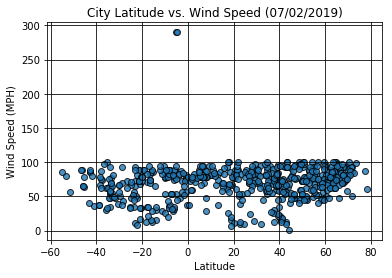

In [25]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lat, hum, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(b=True, which='major', color='black', linestyle='-')

# Save the figure
plt.savefig("img/latvsWindSpeed.png")

# Show plot
plt.show()


In [26]:
weather_df.to_html('weather_data.html')

# WeatherPy
----
### Analysis

- As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.

- There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

- There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.